# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from api_keys import geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city

   # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

#     # Run an API request for each of the cities
    try:
#         # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

#       Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp - 273,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     # If an error is experienced, skip the city
    except:
         print("City not found. Skipping...")
         pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | margate
Processing Record 2 of Set 1 | ilulissat
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | meggen
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | stanley
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | qaqortoq
Processing Record 9 of Set 1 | fort bragg
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | sao jose da coroa grande
Processing Record 12 of Set 1 | mochudi
Processing Record 13 of Set 1 | college
Processing Record 14 of Set 1 | nyala
Processing Record 15 of Set 1 | lompoc
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | constantia
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | khandud
Processing Record 20 of Set 1 | luwingu
Processing Record 21 of Set 1 | boa vista
Processing Record 22 of Set 1 | tobi village
City not found. Skipping...

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margate,51.3813,1.3862,14.98,60,57,5.36,GB,1712061578
1,ilulissat,69.2167,-51.1000,-2.84,68,40,0.00,GL,1712061484
2,waitangi,-43.9535,-176.5597,11.72,93,100,2.05,NZ,1712061471
3,meggen,47.0469,8.3747,14.95,53,40,5.14,CH,1712061578
4,albany,42.6001,-73.9662,4.49,80,100,1.34,US,1712061258
...,...,...,...,...,...,...,...,...,...
580,sedalia,38.7045,-93.2283,9.28,100,100,7.72,US,1712061306
581,alto piquiri,-24.0281,-53.4406,25.88,70,11,1.30,BR,1712061362
582,juan diaz covarrubias,18.1628,-95.2069,26.29,72,74,6.62,MX,1712061706
583,yoichi,43.2039,140.7703,1.19,77,6,3.39,JP,1712061706


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margate,51.3813,1.3862,14.98,60,57,5.36,GB,1712061578
1,ilulissat,69.2167,-51.1000,-2.84,68,40,0.00,GL,1712061484
2,waitangi,-43.9535,-176.5597,11.72,93,100,2.05,NZ,1712061471
3,meggen,47.0469,8.3747,14.95,53,40,5.14,CH,1712061578
4,albany,42.6001,-73.9662,4.49,80,100,1.34,US,1712061258


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margate,51.3813,1.3862,14.98,60,57,5.36,GB,1712061578
1,ilulissat,69.2167,-51.1000,-2.84,68,40,0.00,GL,1712061484
2,waitangi,-43.9535,-176.5597,11.72,93,100,2.05,NZ,1712061471
3,meggen,47.0469,8.3747,14.95,53,40,5.14,CH,1712061578
4,albany,42.6001,-73.9662,4.49,80,100,1.34,US,1712061258


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

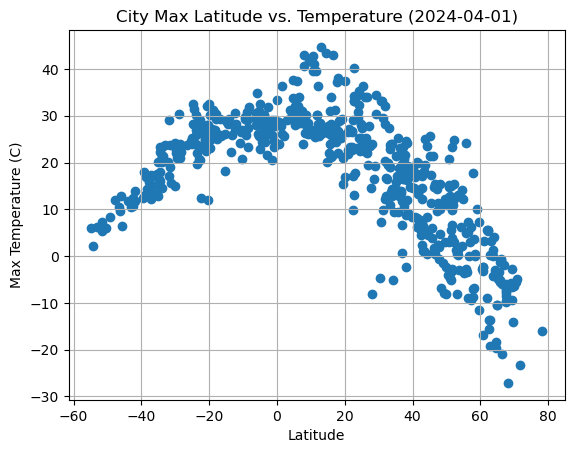

<Figure size 1000x675 with 0 Axes>

In [8]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]

plt.scatter(
    x=x,
    y=y, 
    marker="o"
)

# # Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-04-01)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True) 
plt.figure(figsize=(10, 6.75))

# # Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

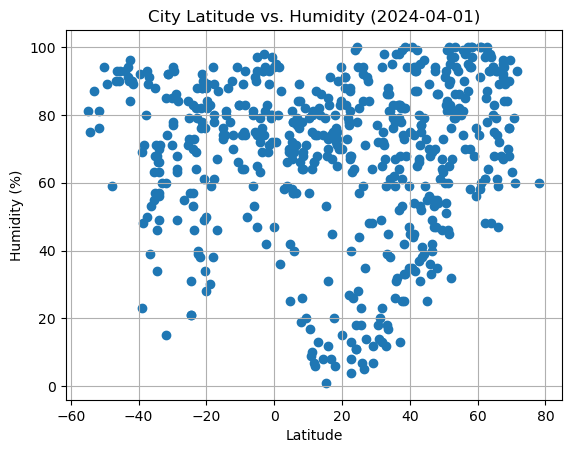

<Figure size 1000x675 with 0 Axes>

In [9]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]

plt.scatter(
    x=x,
    y=y, 
    marker="o"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-04-01)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True) 
plt.figure(figsize=(10, 6.75))


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

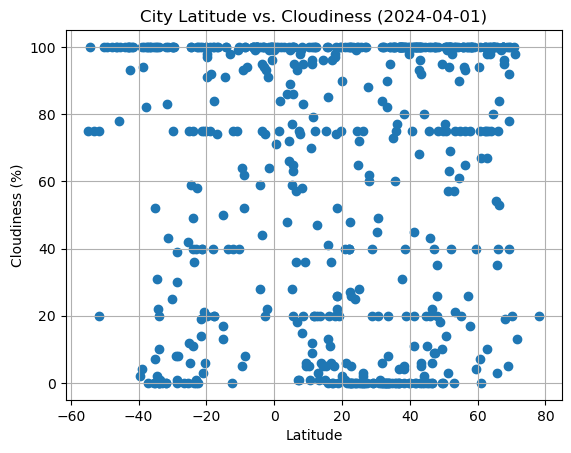

<Figure size 1000x675 with 0 Axes>

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]

plt.scatter(
    x=x,
    y=y, 
    marker="o"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-04-01)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True) 
plt.figure(figsize=(10, 6.75))

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

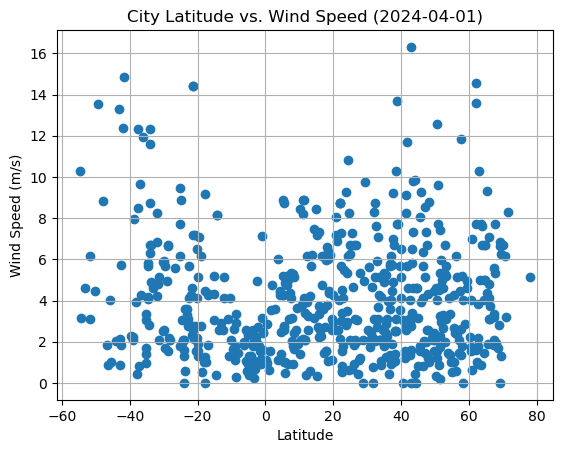

<Figure size 1000x675 with 0 Axes>

In [11]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]

plt.scatter(
    x=x,
    y=y, 
    marker="o"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-04-01)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True) 
plt.figure(figsize=(10, 6.75))

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def plot_with_regression(x, y, slope, intercept, y_label):
    r_value = linregress(x, y)
    print("The r-value is: ", r_value.rvalue)
    slope, intercept = np.polyfit(x, y, 1)
    plt.scatter(
    x=x,
    y=y, 
    marker="o"
    )
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    xy = (min(x), min(y)) # placing annotation at minimums of x & y
    plt.annotate("y = " + str(round(slope, 2)) + " x + " + str(round(intercept, 2)), xy, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.grid(True) 
    plt.plot(x, slope * x + intercept, color='red')
    plt.figure(figsize=(10, 6.75))
    plt.figure(figsize=(10, 6.75))
    return 


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margate,51.3813,1.3862,14.98,60,57,5.36,GB,1712061578
1,ilulissat,69.2167,-51.1000,-2.84,68,40,0.00,GL,1712061484
3,meggen,47.0469,8.3747,14.95,53,40,5.14,CH,1712061578
4,albany,42.6001,-73.9662,4.49,80,100,1.34,US,1712061258
5,stanley,54.8680,-1.6985,12.21,81,75,1.03,GB,1712061473


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,waitangi,-43.9535,-176.5597,11.72,93,100,2.05,NZ,1712061471
6,port-aux-francais,-49.3500,70.2167,8.44,89,100,13.53,TF,1712061323
9,adamstown,-25.0660,-130.1015,23.89,79,12,9.46,PN,1712061321
10,sao jose da coroa grande,-8.8978,-35.1478,30.85,64,52,1.78,BR,1712061580
11,mochudi,-24.4167,26.1500,31.48,21,59,2.09,BW,1712061580


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:  -0.8577226067384562


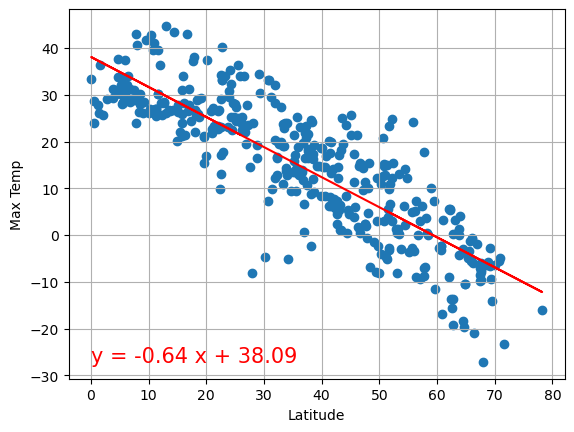

<Figure size 1000x675 with 0 Axes>

<Figure size 1000x675 with 0 Axes>

In [23]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
y_label = "Max Temp"
slope1 = 0
intercept1 = 0

plot_with_regression(x, y, slope1, intercept1, y_label)
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

The r-value is:  0.7931486501570251


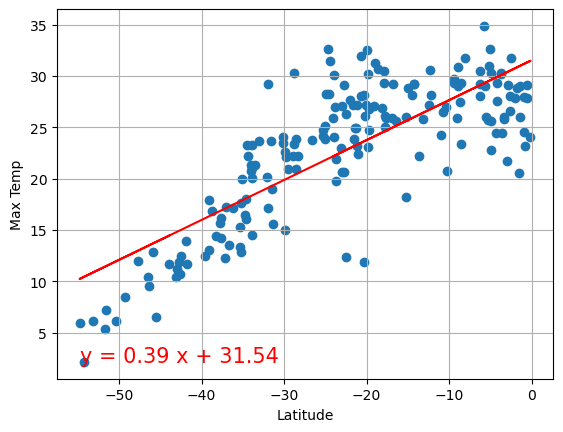

<Figure size 1000x675 with 0 Axes>

<Figure size 1000x675 with 0 Axes>

In [24]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
y_label = "Max Temp"
slope1 = 0
intercept1 = 0
plot_with_regression(x, y, slope1, intercept1, y_label)

plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** The correlation r measures the strength of the linear relationship 
between two quantitative variables.

Here, r = -0.8577226067384562 in the northern hemisphere and r = 0.7931486501570251 in the southern hemishpere indicting negative and positive, respectively, that are Strong although the norhtern hemisphere has a stronger relationship .

See https://www.westga.edu/academics/research/vrc/assets/docs/scatterplots_and_correlation_notes.pdf#:~:text=The%20correlation%20r%20measures%20the%20strength%20of%20the,near%200%20indicate%20a%20very%20weak%20linear%20relationship.


### Humidity vs. Latitude Linear Regression Plot

The r-value is:  0.2682098188561531


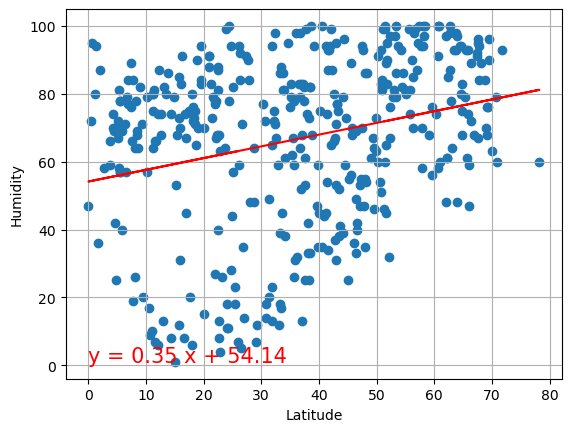

<Figure size 1000x675 with 0 Axes>

<Figure size 1000x675 with 0 Axes>

In [25]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
y_label = "Humidity"
slope1 = 0
intercept1 = 0
plot_with_regression(x, y, slope1, intercept1, y_label)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

The r-value is:  0.04796551263170629


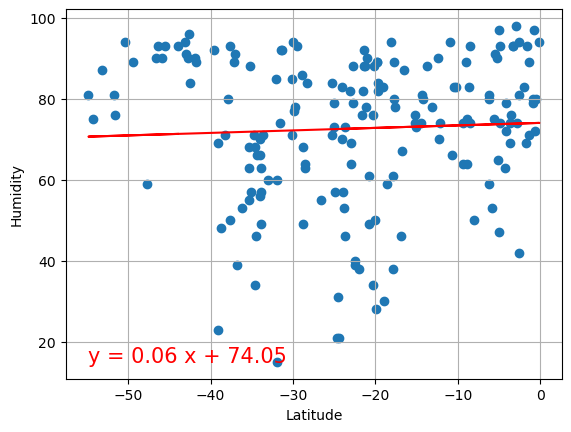

<Figure size 1000x675 with 0 Axes>

<Figure size 1000x675 with 0 Axes>

In [26]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
y_label = "Humidity"
slope1 = 0
intercept1 = 0
plot_with_regression(x, y, slope1, intercept1, y_label)

plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** Here, r = 0.2682098188561531 in the northern hemisphere and r = 0.04796551263170629 in the southern hemishpere indicting that both have postive relationshps that are considered Very Weak in the reference cited above. 


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:  0.17418448139319762


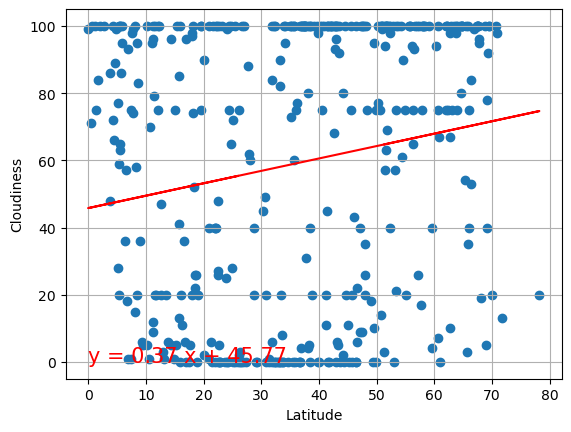

<Figure size 1000x675 with 0 Axes>

<Figure size 1000x675 with 0 Axes>

In [27]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
y_label = "Cloudiness"
slope1 = 0
intercept1 = 0
plot_with_regression(x, y, slope1, intercept1, y_label)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

The r-value is:  0.12474990027521553


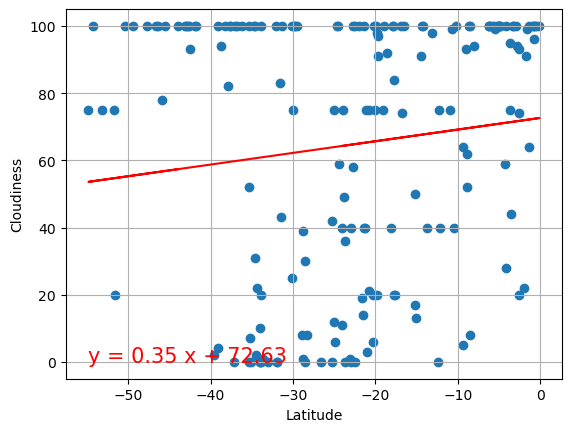

<Figure size 1000x675 with 0 Axes>

<Figure size 1000x675 with 0 Axes>

In [28]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
y_label = "Cloudiness"
slope1 = 0
intercept1 = 0
plot_with_regression(x, y, slope1, intercept1, y_label)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Here, r = 0.17418448139319762 in the northern hemisphere and r = 0.12474990027521553 in the southern hemishpere indicting positive relationshps that are considered Very Weak in the reference cited above.  
 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:  0.06536214795308917


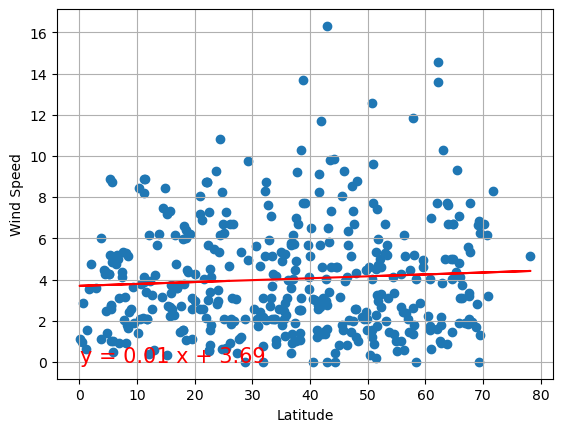

<Figure size 1000x675 with 0 Axes>

<Figure size 1000x675 with 0 Axes>

In [29]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
y_label = "Wind Speed"
slope1 = 0
intercept1 = 0
plot_with_regression(x, y, slope1, intercept1, y_label)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

The r-value is:  -0.4002815660815795


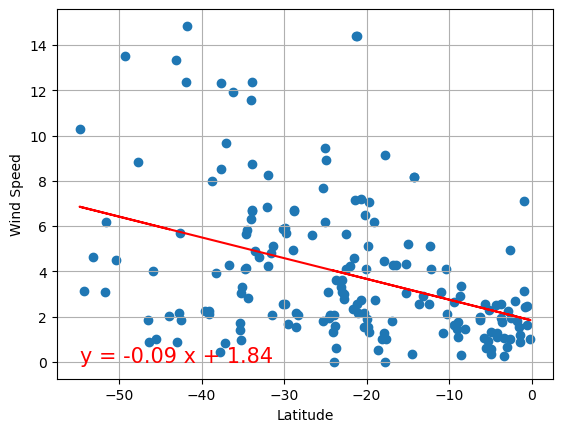

<Figure size 1000x675 with 0 Axes>

<Figure size 1000x675 with 0 Axes>

In [30]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
y_label = "Wind Speed"
slope1 = 0
intercept1 = 0
plot_with_regression(x, y, slope1, intercept1, y_label)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Here, r = 0.06536214795308917  in the northern hemisphere and r  -0.4002815660815795 in the southern hemishpere indicting negative and positive relationshps, respectively, that are considered Very Weak in the reference cited above.  
